In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm.utils import BackupHelper, FunctionTimer

In [20]:
import fbm.sim as sim

generators = {
    "Naive": (sim.NaiveFBmGenerator(), 1000),
    "Hosking": (sim.HoskingFBmGenerator(), 10000),
    "Cholesky": (sim.CholeskyFBmGenerator(), 1000),
    "Davies Harte": (sim.DaviesHarteFBmGenerator(), 100000)
}

In [21]:
Hs = [0.1, 0.25, 0.5, 0.75, 0.9]
sim_num = 1000
sizes = [10, 100, 1000, 10000, 100000]

result = {}

for H in Hs:
    g:sim.FBmGeneratorInterface
    r = dict()
    for g_name, g_lim in generators.items():
        g, lim = g_lim
        elapsed_time = []
        
        timer_backup = BackupHelper(
            f"./findings/generators",file_name="compare"
        )
        for size in sizes:
            if size > lim:
                continue
            
            backup_version = 0

            paths_backup = BackupHelper(
                f"./findings/generators/{g_name}/paths/{H}",suffix=size
            )

            paths = []
            timer = FunctionTimer()

            for i in range(sim_num):
                paths.append(g.generate_fBm(H, size))

                if (i+1)%100 == 0:
                    timer.pause()
                    paths_backup.dump(paths)
                    timer.cont()

            elapsed_time.append(timer.stop())
        r[g_name] = elapsed_time
        timer_backup.dump(r)

        print(f"{g_name} finished, {elapsed_time}")
        plt.plot(sizes[:len(elapsed_time)], elapsed_time, '-o', label=g_name)
    result[H] = r

    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
        

KeyboardInterrupt: 

In [ ]:
print(result)

{0.1: {'Naive': [0.18555589951574802, 8.537339711561799, 493.8113450924866], 'Hosking': [0.23538104770705104, 2.253237513359636, 26.434271258302033, 586.0692739197984], 'Cholesky': [0.044307262636721134, 0.2329375226981938, 76.42477371403947], 'Davies Harte': [0.10917097935453057, 0.21346914721652865, 1.1344210095703602, 16.717881882097572, 129.96041224803776]}, 0.25: {'Naive': [0.18871189979836345, 8.608568505384028, 436.3900466398336], 'Hosking': [0.2451121974736452, 2.3160380301997066, 26.70052028214559, 568.7762375292368], 'Cholesky': [0.048331388272345066, 0.23493072018027306, 76.68073175521567], 'Davies Harte': [0.10606599785387516, 0.21653351746499538, 1.1232541352510452, 16.734068545978516, 129.14575366768986]}, 0.5: {'Naive': [0.16082704439759254, 1.9056683834642172, 311.16242353757843], 'Hosking': [0.2573294206522405, 2.247360489796847, 26.427551415748894, 584.4563230252825], 'Cholesky': [0.04472739528864622, 0.2615621411241591, 82.18450985755771], 'Davies Harte': [0.11236936

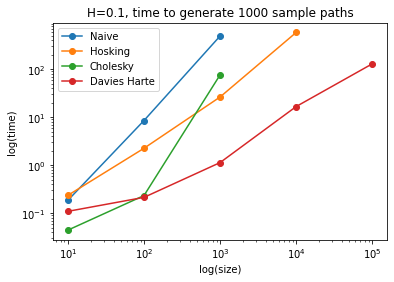

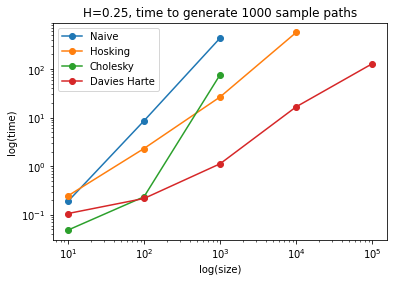

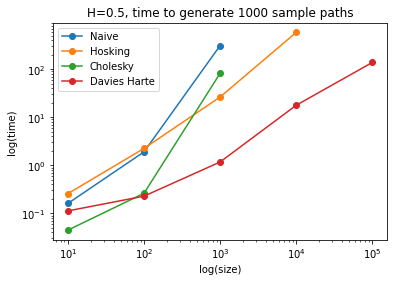

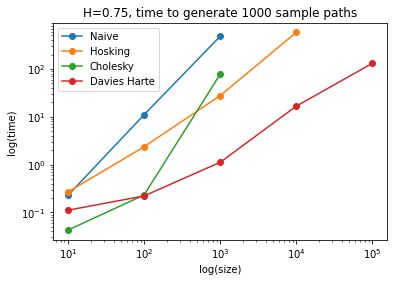

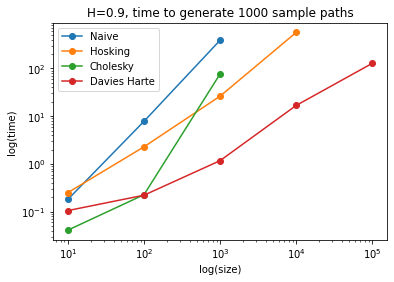

In [ ]:
for H, times in result.items():
    for gen_name, gen_time in times.items():
        plt.plot(sizes[:len(gen_time)], gen_time, '-o', label=gen_name)
    plt.xlabel("log(size)")
    plt.ylabel("log(time)")
    plt.title(f"H={H}, time to generate 1000 sample paths")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [4]:
Hs = [i*0.1 for i in range(1,10)]
sizes = [50, 100, 500, 1000, 5000]
samples = 20

from fbm.sim import CholeskyFBmGenerator
cholesky = CholeskyFBmGenerator()

from fbm.sim import HoskingFBmGenerator
hosking = HoskingFBmGenerator()

In [6]:
def add_val(df, size, h, val):
    if h not in df:
        df[h] = dict()
    if size not in df[h]:
        df[h][size] = list()
    df[h][size].append(val)

In [7]:
cholesky_first_sim = dict()

In [8]:
sizes = [50, 100, 500, 1000]
samples = 1

for iter in range(samples):
    for size in sizes:
        for h in Hs:
            timer = FunctionTimer()
            cholesky.generate_fBm(size=size, H=h)
            t = timer.stop()
            add_val(cholesky_first_sim, size, h, t)
            print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')

iter 1/1 H(0.1), size(50): 0.0009529139999813196
iter 1/1 H(0.2), size(50): 0.02002292999986821
iter 1/1 H(0.30000000000000004), size(50): 0.019936363000169877
iter 1/1 H(0.4), size(50): 0.012517136000042228
iter 1/1 H(0.5), size(50): 0.01029785300011099
iter 1/1 H(0.6000000000000001), size(50): 0.01022542999999132
iter 1/1 H(0.7000000000000001), size(50): 0.010155562000136342
iter 1/1 H(0.8), size(50): 0.012535654999965118
iter 1/1 H(0.9), size(50): 0.010180817999980718
iter 1/1 H(0.1), size(100): 0.07599283700005799
iter 1/1 H(0.2), size(100): 0.07676704900018194
iter 1/1 H(0.30000000000000004), size(100): 0.08280394799999158
iter 1/1 H(0.4), size(100): 0.07575816200005647
iter 1/1 H(0.5), size(100): 0.0760340140000153
iter 1/1 H(0.6000000000000001), size(100): 0.07714659600014784
iter 1/1 H(0.7000000000000001), size(100): 0.07692318499994144
iter 1/1 H(0.8), size(100): 0.07684068399998978
iter 1/1 H(0.9), size(100): 0.07932359300002645
iter 1/1 H(0.1), size(500): 9.329556207999985
i

In [20]:
hsoking_first_sim = dict()

In [21]:
sizes = [50, 100, 500, 1000, 5000, 10000]
samples = 10

for iter in range(samples):
    for size in sizes:
        for h in Hs:
            timer = FunctionTimer()
            hosking.generate_fBm(size=size, H=h)
            t = timer.stop()
            add_val(hsoking_first_sim, size, h, t)
            print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')

iter 1/10 H(0.1), size(50): 0.002610796999761078
iter 1/10 H(0.2), size(50): 0.0021696839999094664
iter 1/10 H(0.30000000000000004), size(50): 0.002017683999838482
iter 1/10 H(0.4), size(50): 0.0019933040002797497
iter 1/10 H(0.5), size(50): 0.002010648000123183
iter 1/10 H(0.6000000000000001), size(50): 0.001869343000180379
iter 1/10 H(0.7000000000000001), size(50): 0.0019515700000738434
iter 1/10 H(0.8), size(50): 0.0019478460003483633
iter 1/10 H(0.9), size(50): 0.001985497000077885
iter 1/10 H(0.1), size(100): 0.004063817999849562
iter 1/10 H(0.2), size(100): 0.003967981999721815
iter 1/10 H(0.30000000000000004), size(100): 0.004327489999923273
iter 1/10 H(0.4), size(100): 0.003891803999977128
iter 1/10 H(0.5), size(100): 0.004525073999957385
iter 1/10 H(0.6000000000000001), size(100): 0.00418659699971613
iter 1/10 H(0.7000000000000001), size(100): 0.002248332999897684
iter 1/10 H(0.8), size(100): 0.0022024119998604874
iter 1/10 H(0.9), size(100): 0.0023725010000816837
iter 1/10 H(

In [29]:
hsoking_first_sim[0.1][10000]

[0.7406870080158114,
 0.7149862800142728,
 0.7036851459997706,
 0.7288354079937562,
 0.7232195449760184,
 0.7281888910220005,
 0.6853312990278937,
 0.7258371890056878,
 0.6923765030223876,
 0.7360655819647945]

In [17]:
t = [[cholesky_first_sim[k][s] for k in cholesky_first_sim.keys()] 
    for s in cholesky_first_sim[0.1].keys()]

t = np.array(t)
avg = np.average(t, axis=1)
cholesky_first_sim_backuper = BackupHelper(f"./findings/generators/Cholesky",file_name="first_sim")
cholesky_first_sim_backuper.dump(cholesky_first_sim)
avg

array([[1.18694068e-02],
       [7.75100076e-02],
       [9.24036998e+00],
       [7.41467059e+01]])

In [22]:
t = [sum([hsoking_first_sim[k][s] for k in hsoking_first_sim.keys()], [])
    for s in hsoking_first_sim[0.1].keys()]

t = np.array(t)
avg = np.average(t, axis=1)
hsoking_first_sim_backuper = BackupHelper(f"./findings/generators/Hosking",file_name="first_sim")
hsoking_first_sim_backuper.dump(hsoking_first_sim)
avg

array([0.00163955, 0.00252099, 0.01278109, 0.02613448, 0.18394374,
       0.57289601])

In [23]:
t

array([[0.0026108 , 0.00396411, 0.0038263 , 0.00389433, 0.00384472,
        0.00386967, 0.0039641 , 0.0038873 , 0.0038586 , 0.00402029,
        0.00216968, 0.0014586 , 0.00159947, 0.00148193, 0.00143514,
        0.00146092, 0.00146521, 0.00146676, 0.00145945, 0.0014445 ,
        0.00201768, 0.00145119, 0.00110013, 0.00133114, 0.00144714,
        0.00144469, 0.00145226, 0.00146398, 0.00144498, 0.00143342,
        0.0019933 , 0.00143611, 0.00109914, 0.00111974, 0.00142839,
        0.00136385, 0.00145738, 0.00144801, 0.00143645, 0.00132624,
        0.00201065, 0.00145309, 0.00113238, 0.00110778, 0.0014197 ,
        0.00111115, 0.00154664, 0.00142198, 0.00145042, 0.0010736 ,
        0.00186934, 0.00145379, 0.00110171, 0.00111158, 0.00141765,
        0.00111436, 0.00108765, 0.00108324, 0.00143422, 0.00106655,
        0.00195157, 0.0014908 , 0.00108533, 0.00108495, 0.00143279,
        0.00108087, 0.00111057, 0.00108174, 0.00144305, 0.00120187,
        0.00194785, 0.00146981, 0.00108664, 0.00

In [24]:
cholesky_sim = dict()

In [27]:
sizes = [50, 100, 500, 1000]
samples = 100

for size in sizes:
    for h in Hs:
        cholesky.generate_fBm(size=size, H=h)
        timer = FunctionTimer()
        for _ in range(samples):
            cholesky.generate_fBm(size=size, H=h)
        t = timer.stop()
        add_val(cholesky_sim, size, h, t)
        print(f'H({h}), size({size}): {t}')

H(0.1), size(50): 0.009174836999591207
H(0.2), size(50): 0.009377659000165295
H(0.30000000000000004), size(50): 0.009094769000512315
H(0.4), size(50): 0.009024159000546206
H(0.5), size(50): 0.009617584999432438
H(0.6000000000000001), size(50): 0.008879987000000256
H(0.7000000000000001), size(50): 0.00878230899979826
H(0.8), size(50): 0.008800650000011956
H(0.9), size(50): 0.008716999999705877
H(0.1), size(100): 0.014448230999732914
H(0.2), size(100): 0.014335660999677202
H(0.30000000000000004), size(100): 0.014790178000112064
H(0.4), size(100): 0.014433368000027258
H(0.5), size(100): 0.01410425900030532
H(0.6000000000000001), size(100): 0.014162023000608315
H(0.7000000000000001), size(100): 0.014254683000217483
H(0.8), size(100): 0.014182906999849365
H(0.9), size(100): 0.014107113999671128
H(0.1), size(500): 0.06197053100004268
H(0.2), size(500): 0.06214685999930225
H(0.30000000000000004), size(500): 0.062393140000494896
H(0.4), size(500): 0.06223526799931278
H(0.5), size(500): 0.06381

In [33]:
t = [[cholesky_sim[k][s][-1] for k in cholesky_sim.keys()] 
    for s in cholesky_sim[0.1].keys()]

t = np.array(t)
avg = np.average(t, axis=1)
cholesky_sim_backuper = BackupHelper(f"./findings/generators/Cholesky",file_name="sim_time")
cholesky_sim_backuper.dump(cholesky_sim)
avg

array([0.00905211, 0.01431316, 0.06298068, 0.1335909 ])

In [34]:
hosking_sim = dict()

In [35]:
sizes = [50, 100, 500, 1000, 5000, 10000]
samples = 100

for size in sizes:
    for h in Hs:
        hosking.generate_fBm(size=size, H=h)
        for _ in range(10):
            timer = FunctionTimer()
            for _ in range(samples):
                hosking.generate_fBm(size=size, H=h)
            t = timer.stop()
            add_val(hosking_sim, size, h, t)
        print(f'H({h}), size({size}) done')

H(0.1), size(50) done
H(0.2), size(50) done
H(0.30000000000000004), size(50) done
H(0.4), size(50) done
H(0.5), size(50) done
H(0.6000000000000001), size(50) done
H(0.7000000000000001), size(50) done
H(0.8), size(50) done
H(0.9), size(50) done
H(0.1), size(100) done
H(0.2), size(100) done
H(0.30000000000000004), size(100) done
H(0.4), size(100) done
H(0.5), size(100) done
H(0.6000000000000001), size(100) done
H(0.7000000000000001), size(100) done
H(0.8), size(100) done
H(0.9), size(100) done
H(0.1), size(500) done
H(0.2), size(500) done
H(0.30000000000000004), size(500) done
H(0.4), size(500) done
H(0.5), size(500) done
H(0.6000000000000001), size(500) done
H(0.7000000000000001), size(500) done
H(0.8), size(500) done
H(0.9), size(500) done
H(0.1), size(1000) done
H(0.2), size(1000) done
H(0.30000000000000004), size(1000) done
H(0.4), size(1000) done
H(0.5), size(1000) done
H(0.6000000000000001), size(1000) done
H(0.7000000000000001), size(1000) done
H(0.8), size(1000) done
H(0.9), size

In [39]:
t = [sum([hosking_sim[k][s] for k in hosking_sim.keys()], []) 
    for s in hosking_sim[0.1].keys()]

t = np.array(t)
avg = np.average(t, axis=1)
hosking_sim_backuper = BackupHelper(f"./findings/generators/Hosking",file_name="sim_time")
hosking_sim_backuper.dump(hosking_sim)
avg

array([ 0.11247864,  0.22371666,  1.19021194,  2.53064833, 17.93272702,
       56.52708618])

In [38]:
hosking_sim

{0.1: {50: [0.1301017949990637,
   0.12480623299961735,
   0.11030347100131621,
   0.1112391110000317,
   0.11755366800025513,
   0.10892339500060189,
   0.10883059200023126,
   0.11305906400048116,
   0.11246347000087553,
   0.10844614900088345],
  100: [0.2357468490008614,
   0.2513688059989363,
   0.22298907100048382,
   0.22143256200070027,
   0.22064644199963368,
   0.23288755799876526,
   0.22636126799989142,
   0.24283205100073246,
   0.2228369680015021,
   0.22011629299959168],
  500: [1.2171689520000655,
   1.1954297230004158,
   1.1730285909998202,
   1.205790784999408,
   1.2003965280000557,
   1.1999500220008485,
   1.1903599469987967,
   1.183249416999388,
   1.1670217819992104,
   1.168441135001558],
  1000: [2.6242529510000168,
   2.565625761000774,
   2.5291396840002562,
   2.524723020998863,
   2.515995859999748,
   2.5045403109998006,
   2.4914129200005846,
   2.496249544999955,
   2.531563387999995,
   2.565894761999516],
  5000: [18.014896868000505,
   17.9766323120

In [42]:
hosking.generate_fBm(size=50, H=0.1)
timer = FunctionTimer()
for _ in range(samples):
    hosking.generate_fBm(size=50, H=0.1)
timer.stop()

0.11458135000430048

In [43]:
cholesky.generate_fBm(size=50, H=0.1)
timer = FunctionTimer()
for _ in range(samples):
    cholesky.generate_fBm(size=50, H=0.1)
timer.stop()

0.009473149002587888

In [47]:
from fbm.utils import load_pickel

In [49]:
cholesky_first_sim = load_pickel('./findings/generators/Cholesky/first_sim')

In [50]:
size = 5000
timer = FunctionTimer()
cholesky.generate_fBm(size=size, H=0.1)
t = timer.stop()
add_val(cholesky_first_sim, size, 0.1, t)

timer = FunctionTimer()
for _ in range(samples):
    cholesky.generate_fBm(size=size, H=0.1)
timer.stop()

1.3242701679992024

In [51]:
cholesky_first_sim[0.1]

{50: [0.0009529139999813196],
 100: [0.07599283700005799],
 500: [9.329556207999985],
 1000: [74.002233617],
 5000: [9478.707464744002]}

In [52]:
cholesky_first_sim_backuper = BackupHelper(f"./findings/generators/Cholesky",file_name="first_sim")
cholesky_first_sim_backuper.dump(cholesky_first_sim)

In [56]:
from fbm.sim import NaiveFBmGenerator

sizes = [50, 100, 500, 1000, 5000, 10000]
samples = 1

naive = NaiveFBmGenerator()
naive_first_sim = dict()

for iter in range(samples):
    for size in sizes:
        for h in Hs:
            timer = FunctionTimer()
            naive.generate_fBm(size=size, H=h)
            t = timer.stop()
            add_val(cholesky_first_sim, size, h, t)
            print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')

iter 1/1 H(0.1), size(50): 0.0014453170006163418
iter 1/1 H(0.2), size(50): 0.002541232002840843
iter 1/1 H(0.30000000000000004), size(50): 0.0015834699952392839
iter 1/1 H(0.4), size(50): 0.001598874994670041
iter 1/1 H(0.5), size(50): 0.0007433550053974614
iter 1/1 H(0.6000000000000001), size(50): 0.0015136709989747033
iter 1/1 H(0.7000000000000001), size(50): 0.0014741259947186336
iter 1/1 H(0.8), size(50): 0.0014413259996217676
iter 1/1 H(0.9), size(50): 0.001930366997839883
iter 1/1 H(0.1), size(100): 0.004764122000779025
iter 1/1 H(0.2), size(100): 0.004426241997862235
iter 1/1 H(0.30000000000000004), size(100): 0.004214464002870955
iter 1/1 H(0.4), size(100): 0.00557279700296931
iter 1/1 H(0.5), size(100): 0.0013195759966038167
iter 1/1 H(0.6000000000000001), size(100): 0.004504368997004349
iter 1/1 H(0.7000000000000001), size(100): 0.003900689000147395
iter 1/1 H(0.8), size(100): 0.004322679997130763
iter 1/1 H(0.9), size(100): 0.0055617120015085675
iter 1/1 H(0.1), size(500): 

KeyboardInterrupt: 

In [67]:
t = [sum([naive_first_sim[k][s] for k in naive_first_sim.keys()], []) 
    for s in naive_first_sim[0.1].keys()]

t = np.array(t)
avg = np.average(t, axis=1)

/home/chester/anaconda3/envs/ic/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


AxisError: axis 1 is out of bounds for array of dimension 1

In [60]:
naive_first_sim = cholesky_first_sim

In [65]:
for k in naive_first_sim.keys():
    for s in naive_first_sim[0.1].keys():
        if s not in naive_first_sim[k]:
            naive_first_sim[k][s] = list()

In [71]:
t = [sum([naive_first_sim[k][s] for k in naive_first_sim.keys()], []) 
    for s in naive_first_sim[0.1].keys()]
for l in t:
    print(np.average(l))

0.0015857487766576621
0.004287405666319601
0.1476678388886891
0.49742729433233357
60.625866755223086
433.5628967403342


In [72]:
from fbm.sim import DaviesHarteFBmGenerator

davies = DaviesHarteFBmGenerator()
sizes = [50, 100, 500, 1000, 5000, 10000]
samples = 1

davies_sim = dict()

for iter in range(samples):
    for size in sizes:
        for h in Hs:
            timer = FunctionTimer()
            for _ in range(100):
                davies.generate_fBm(size=size, H=h)
            t = timer.stop()
            add_val(davies_sim, size, h, t)
            print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')


iter 1/1 H(0.1), size(50): 0.015039428006275557
iter 1/1 H(0.2), size(50): 0.014669148993561976
iter 1/1 H(0.30000000000000004), size(50): 0.014748293993761763
iter 1/1 H(0.4), size(50): 0.01632004299608525
iter 1/1 H(0.5), size(50): 0.014403639012016356
iter 1/1 H(0.6000000000000001), size(50): 0.014564657001756132
iter 1/1 H(0.7000000000000001), size(50): 0.017239341003005393
iter 1/1 H(0.8), size(50): 0.014326497999718413
iter 1/1 H(0.9), size(50): 0.014377947998582385
iter 1/1 H(0.1), size(100): 0.020389181998325512
iter 1/1 H(0.2), size(100): 0.022876138013089076
iter 1/1 H(0.30000000000000004), size(100): 0.025738135998835787
iter 1/1 H(0.4), size(100): 0.022093728999607265
iter 1/1 H(0.5), size(100): 0.02073595799447503
iter 1/1 H(0.6000000000000001), size(100): 0.020707718998892233
iter 1/1 H(0.7000000000000001), size(100): 0.02019744999415707
iter 1/1 H(0.8), size(100): 0.020354544001747854
iter 1/1 H(0.9), size(100): 0.020302649005316198
iter 1/1 H(0.1), size(500): 0.05758087

In [73]:
t = [sum([davies_sim[k][s] for k in naive_first_sim.keys()], []) 
    for s in davies_sim[0.1].keys()]
for l in t:
    print(np.average(l))

0.015076555222751468
0.021488389444938447
0.057745749109825634
0.10682777077858595
0.798854677667906
1.6206206210012573


In [74]:
from fbm.sim.davies_harte import DaviesHarteBiFBmGenerator

davies_bi = DaviesHarteBiFBmGenerator()
sizes = [50, 100, 500, 1000, 5000, 10000]
samples = 1

davies_bi_sim = dict()

for iter in range(samples):
    for size in sizes:
        timer = FunctionTimer()
        for _ in range(100):
            davies_bi.generate_bifBm(H1=0.1, H2=0.3, rho=0.6, size=size)
        t = timer.stop()
        add_val(davies_bi_sim, size, 0.9, t)
        print(f'iter {iter+1}/{samples} H({0.9}), size({size}): {t}')

iter 1/1 H(0.9), size(50): 0.6990080709947506
iter 1/1 H(0.9), size(100): 1.3729951690038433
iter 1/1 H(0.9), size(500): 5.416246845008573
iter 1/1 H(0.9), size(1000): 10.566146083001513
iter 1/1 H(0.9), size(5000): 84.8015126070095
iter 1/1 H(0.9), size(10000): 169.09401360098855


In [76]:
from fbm.sim.naive import NaiveBiFBmGenerator

naive_bi = NaiveBiFBmGenerator()
sizes = [50, 100, 500]
samples = 1

naive_bi_sim = dict()

for iter in range(samples):
    for size in sizes:
        timer = FunctionTimer()
        for _ in range(100):
            naive_bi.generate_bifBm(H1=0.1, H2=0.3, rho=0.6, size=size)
        t = timer.stop()
        add_val(naive_bi_sim, size, h, t)
        print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')

iter 1/1 H(0.9), size(50): 0.6028960010007722
iter 1/1 H(0.9), size(100): 2.2302489209978376
iter 1/1 H(0.9), size(500): 43.00707088099443


In [77]:
sizes = [1000]
samples = 1

naive_bi_sim = dict()

for iter in range(samples):
    for size in sizes:
        timer = FunctionTimer()
        for _ in range(100):
            naive_bi.generate_bifBm(H1=0.1, H2=0.3, rho=0.6, size=size)
        t = timer.stop()
        add_val(naive_bi_sim, size, h, t)
        print(f'iter {iter+1}/{samples} H({h}), size({size}): {t}')

iter 1/1 H(0.9), size(1000): 348.0384434169973


In [10]:
from fbm.sim.davies_harte import DaviesHarteBiFBmGenerator

davies_bi = DaviesHarteBiFBmGenerator()
timer = FunctionTimer()
for _ in range(100):
    davies_bi.generate_bifBm(H1=0.1, H2=0.3, rho=0.6, size=500)
t = timer.stop()
t

5.015831538010389

In [12]:
from fbm.sim.davies_harte import DaviesHarteBiFBmGenerator

davies_bi = DaviesHarteBiFBmGenerator()
timer = FunctionTimer()
for _ in range(100):
    davies_bi.generate_bifBm(H1=0.1, H2=0.3, rho=0.6, size=5000)
t = timer.stop()
t

79.47971369401785